<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [48]:
path = '/content/drive/My Drive/DPDM2021_DATA/Project' # เรียกข้อมูลจาก Drive 
data = pd.read_csv(os.path.join(path,'heart.csv'))
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [50]:
data.groupby('age')['target'].apply(list)

age
29                                                  [1]
34                                               [1, 1]
35                                         [1, 1, 0, 0]
37                                               [1, 1]
38                                            [1, 1, 0]
39                                         [1, 1, 1, 0]
40                                            [1, 0, 0]
41                       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
42                             [1, 1, 1, 1, 1, 1, 1, 0]
43                             [1, 1, 1, 1, 1, 0, 0, 0]
44                    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
45                             [1, 1, 1, 1, 1, 1, 0, 0]
46                                [1, 1, 1, 1, 0, 0, 0]
47                                      [1, 1, 1, 0, 0]
48                                [1, 1, 1, 1, 0, 0, 0]
49                                      [1, 1, 1, 0, 0]
50                                [1, 1, 1, 1, 0, 0, 0]
51                 [1, 1, 1, 1, 1, 1, 1, 1, 

In [51]:

import numpy as np

In [56]:
X=np.array(data[['cp','trestbps','chol']])
Y = data['target']

# Association Rules

In [11]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=9c6ac43fdc518cc535462d0357f53c758838fc0cc8e318da20806ce0a8bc4218
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [12]:
from apyori import apriori

In [15]:
frequentItemsets = list(apriori(data,min_support = 0.02))
frequentItemsets[-1]

RelationRecord(items=frozenset({'e', 'p', 'd', 'l', 'k', 'o', 'a'}), support=0.07142857142857142, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'d', 'l', 'k', 'o', 'a', 'e', 'p'}), confidence=0.07142857142857142, lift=1.0), OrderedStatistic(items_base=frozenset({'a'}), items_add=frozenset({'e', 'p', 'd', 'l', 'k', 'o'}), confidence=0.14285714285714285, lift=2.0), OrderedStatistic(items_base=frozenset({'d'}), items_add=frozenset({'e', 'p', 'k', 'l', 'o', 'a'}), confidence=1.0, lift=14.0), OrderedStatistic(items_base=frozenset({'e'}), items_add=frozenset({'p', 'd', 'l', 'o', 'k', 'a'}), confidence=0.125, lift=1.75), OrderedStatistic(items_base=frozenset({'k'}), items_add=frozenset({'e', 'p', 'd', 'l', 'o', 'a'}), confidence=1.0, lift=14.0), OrderedStatistic(items_base=frozenset({'l'}), items_add=frozenset({'e', 'p', 'd', 'o', 'k', 'a'}), confidence=0.19999999999999998, lift=2.8), OrderedStatistic(items_base=frozenset({'o'}), items_add=frozenset({'e', '

## KNN

### Split data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=6)

In [59]:
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6)

### import

In [60]:
from sklearn.neighbors import KNeighborsClassifier

## Define-Train Model1

In [68]:
neigh1 = KNeighborsClassifier(n_neighbors=1) #เชื่อใกล้สุดแค่คนเดียว
neigh1.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Define-Train Model 2

In [69]:
neigh2 = KNeighborsClassifier(n_neighbors=3) #เชื่อใกล้สุด3 คน
neigh2.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Define-Train Model 3

In [72]:
neigh3 = KNeighborsClassifier(n_neighbors=7) #เชื่อใกล้สุด7 คน
neigh3.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

## Define-Train Model 4

In [73]:
neigh4 = KNeighborsClassifier(n_neighbors=9,weights='distance') #เชื่อทุกคนเท่ากัน
neigh4.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

## Define-Train Model 5

In [78]:
neigh5 = KNeighborsClassifier(n_neighbors=11,weights='distance') #เชื่อทุกคนเท่ากัน
neigh5.fit(X_traintrain,y_traintrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

# Validate model  วัดผลแต่ละ Model

In [65]:
from sklearn.metrics import accuracy_score

In [74]:
knn1_result = neigh1.predict(X_val)
accuracy_score(y_val,knn1_result)

0.43478260869565216

In [75]:
knn2_result = neigh2.predict(X_val)
accuracy_score(y_val,knn2_result)

0.45652173913043476

In [76]:
knn3_result = neigh3.predict(X_val)
accuracy_score(y_val,knn3_result)

0.4782608695652174

In [77]:
knn4_result = neigh4.predict(X_val)
accuracy_score(y_val,knn4_result)

0.5869565217391305

In [79]:
knn5_result = neigh5.predict(X_val)
accuracy_score(y_val,knn5_result)

0.5652173913043478

### สรุปผล Model ที่ให้ความแม่นยำ ด้วยวิธี KNN  คือ Model ที่ 4 กำหนดตัวอย่าง 9 คน และเชื่อทุกคน ความแม่นยำ 58%

## 
Evaluation

In [80]:
neigh4full = KNeighborsClassifier(n_neighbors=9,weights='distance') #เชื่อคนใกล้มากว่าคนไกล
neigh4full.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:

cm4 = confusion_matrix(y_test,neigh4full.predict(X_test))
cm4

array([[28, 48],
       [19, 57]])

In [85]:
cr4 = classification_report(y_test,neigh4full.predict(X_test))
print(cr4)

              precision    recall  f1-score   support

           0       0.60      0.37      0.46        76
           1       0.54      0.75      0.63        76

    accuracy                           0.56       152
   macro avg       0.57      0.56      0.54       152
weighted avg       0.57      0.56      0.54       152



# Decision Tree

## import

In [86]:
from sklearn.tree import DecisionTreeClassifier

## define train model 1

In [158]:
mytree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=4)

## define train model 2

In [159]:
mytree2 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5)

## define train model 3

In [160]:
mytree3 = DecisionTreeClassifier(criterion='entropy',max_depth=7)

## define train model 4

In [161]:
mytree4 = DecisionTreeClassifier()

## train

In [162]:
mytree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
mytree2.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [164]:
mytree3.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [165]:
mytree4.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## plot tree

[Text(174.05795454545455, 210.192, 'X[0] <= 0.5\nentropy = 0.994\nsamples = 303\nvalue = [138, 165]'),
 Text(117.94090909090909, 195.696, 'X[1] <= 143.0\nentropy = 0.845\nsamples = 143\nvalue = [104, 39]'),
 Text(91.30909090909091, 181.2, 'X[2] <= 272.5\nentropy = 0.906\nsamples = 112\nvalue = [76, 36]'),
 Text(60.872727272727275, 166.704, 'X[1] <= 107.0\nentropy = 0.954\nsamples = 80\nvalue = [50, 30]'),
 Text(53.263636363636365, 152.208, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(68.48181818181818, 152.208, 'X[1] <= 133.5\nentropy = 0.931\nsamples = 75\nvalue = [49, 26]'),
 Text(38.04545454545455, 137.712, 'X[1] <= 116.0\nentropy = 0.845\nsamples = 55\nvalue = [40, 15]'),
 Text(22.827272727272728, 123.216, 'X[1] <= 111.0\nentropy = 0.977\nsamples = 17\nvalue = [10, 7]'),
 Text(15.218181818181819, 108.72, 'X[2] <= 208.5\nentropy = 0.918\nsamples = 12\nvalue = [8, 4]'),
 Text(7.609090909090909, 94.22399999999999, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(22.827

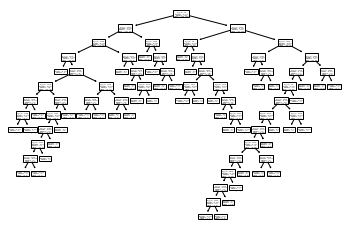

In [166]:
from sklearn.tree import plot_tree
plot_tree(mytree)

[Text(148.8, 190.26, 'X[0] <= 0.5\nentropy = 0.994\nsamples = 303\nvalue = [138, 165]'),
 Text(74.4, 135.9, 'X[1] <= 143.0\nentropy = 0.845\nsamples = 143\nvalue = [104, 39]'),
 Text(37.2, 81.53999999999999, 'entropy = 0.906\nsamples = 112\nvalue = [76, 36]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.459\nsamples = 31\nvalue = [28, 3]'),
 Text(223.20000000000002, 135.9, 'X[2] <= 223.5\nentropy = 0.746\nsamples = 160\nvalue = [34, 126]'),
 Text(186.0, 81.53999999999999, 'entropy = 0.469\nsamples = 60\nvalue = [6, 54]'),
 Text(260.40000000000003, 81.53999999999999, 'X[1] <= 179.0\nentropy = 0.855\nsamples = 100\nvalue = [28, 72]'),
 Text(223.20000000000002, 27.180000000000007, 'entropy = 0.835\nsamples = 98\nvalue = [26, 72]'),
 Text(297.6, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

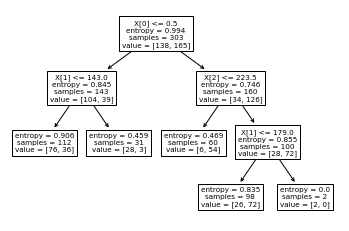

In [167]:
plot_tree(mytree2)

[Text(179.2575, 203.85, 'X[0] <= 0.5\nentropy = 0.994\nsamples = 303\nvalue = [138, 165]'),
 Text(112.995, 176.67000000000002, 'X[1] <= 143.0\nentropy = 0.845\nsamples = 143\nvalue = [104, 39]'),
 Text(69.75, 149.49, 'X[2] <= 272.5\nentropy = 0.906\nsamples = 112\nvalue = [76, 36]'),
 Text(39.06, 122.31, 'X[1] <= 107.0\nentropy = 0.954\nsamples = 80\nvalue = [50, 30]'),
 Text(16.740000000000002, 95.13, 'X[1] <= 101.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(11.16, 67.94999999999999, 'X[2] <= 241.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(5.58, 40.77000000000001, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(16.740000000000002, 40.77000000000001, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(22.32, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(61.38, 95.13, 'X[1] <= 133.5\nentropy = 0.931\nsamples = 75\nvalue = [49, 26]'),
 Text(39.06, 67.94999999999999, 'X[1] <= 116.0\nentropy = 0.845\nsamples = 55\nvalue = [40, 15]'),
 

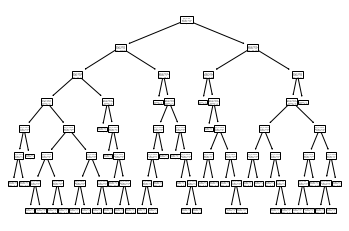

In [168]:
plot_tree(mytree3)

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5, random_state=6)

In [171]:
X_train[:5,:6]

array([[  0, 135, 234],
       [  3, 150, 283],
       [  2, 138, 175],
       [  1, 130, 204],
       [  2, 142, 177]])

In [172]:
X_traintrain,X_val,y_traintrain,y_val = train_test_split(X_train,y_train,test_size=0.3, random_state=6)

In [173]:
X_traintrain

array([[  1, 120, 284],
       [  0, 112, 204],
       [  0, 130, 206],
       [  0, 145, 212],
       [  0, 135, 254],
       [  1, 135, 203],
       [  0, 140, 187],
       [  0, 120, 188],
       [  3, 140, 199],
       [  1, 130, 204],
       [  0, 170, 326],
       [  2,  94, 227],
       [  1, 134, 201],
       [  0, 164, 176],
       [  0, 150, 244],
       [  2, 140, 417],
       [  2, 150, 168],
       [  2, 118, 149],
       [  2, 140, 308],
       [  2, 100, 222],
       [  1, 130, 204],
       [  2, 120, 258],
       [  0, 140, 192],
       [  2, 150, 232],
       [  2, 128, 229],
       [  3, 134, 234],
       [  2, 150, 212],
       [  0, 125, 254],
       [  3, 160, 234],
       [  2, 130, 253],
       [  0, 150, 270],
       [  0, 180, 325],
       [  2, 112, 250],
       [  0, 117, 230],
       [  0, 146, 218],
       [  2, 150, 243],
       [  1, 154, 232],
       [  2, 108, 267],
       [  0, 142, 226],
       [  0, 120, 177],
       [  1, 130, 245],
       [  1, 120

## ทดสอบหาโมเดลที่ดีที่สุดด้วย validation set

### import

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
t_result = mytree.predict(X_val)

In [176]:
t_result

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0])

In [177]:
y_val

array([2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2,
       0, 1])

In [178]:
accuracy_score(y_val,t_result)

0.30434782608695654

In [179]:
t2_result = mytree2.predict(X_val)
accuracy_score(y_val,t2_result)

0.32608695652173914

In [180]:
t3_result = mytree3.predict(X_val)
accuracy_score(y_val,t3_result)

0.30434782608695654

In [181]:
t4_result = mytree4.predict(X_val)
accuracy_score(y_val,t4_result)

0.21739130434782608

## mytree2 ให้ % ที่ดีที่สุดจึงนำมาสร้าง model 

In [182]:
mytree2Full = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5)
mytree2Full.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## การวัดผล

In [185]:
final_resule = mytree2Full.predict(X_test)
accuracy_score(y_test,final_resule)

0.35526315789473684

### สรุปผล การทำนายด้วยต้นไม้ตัดสินใจ ให้ความแม่นยำ 35 % 

# Naive Bayes

In [186]:
import pandas as pd

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [188]:
mnb = MultinomialNB()
y_pred = mnb.fit(X_traintrain, y_traintrain).predict(X_val)

In [189]:
accuracy_score(y_val,y_pred)

0.2608695652173913

### สรุปผล การทำนายด้วยเทคนิค  Naive Bayes ให้ความแม่นยำ 26 %

#  KMeans

## Import

In [190]:
from sklearn.cluster import KMeans

## Define

In [195]:
kmeans = KMeans(n_clusters=3, random_state=4)

## Fit-Predict

In [196]:
y_clust = kmeans.fit_predict(X)
y_clust

array([0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1,

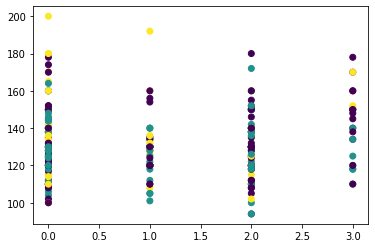

In [197]:
plt.scatter(X[:,0],X[:,1],c=y_clust)